<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#그림-그리기-준비" data-toc-modified-id="그림-그리기-준비-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>그림 그리기 준비</a></span><ul class="toc-item"><li><span><a href="#변수-세팅" data-toc-modified-id="변수-세팅-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>변수 세팅</a></span></li><li><span><a href="#좌석,-통로-사이즈-세팅" data-toc-modified-id="좌석,-통로-사이즈-세팅-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>좌석, 통로 사이즈 세팅</a></span></li><li><span><a href="#좌석-배치를-좌표계로-옮기기" data-toc-modified-id="좌석-배치를-좌표계로-옮기기-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>좌석 배치를 좌표계로 옮기기</a></span></li></ul></li><li><span><a href="#Beta-계산" data-toc-modified-id="Beta-계산-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Beta 계산</a></span></li><li><span><a href="#parameter-setting" data-toc-modified-id="parameter-setting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>parameter setting</a></span><ul class="toc-item"><li><span><a href="#$\lambda_\gamma$-:-row-배치에-영향을-주는-파라미터" data-toc-modified-id="$\lambda_\gamma$-:-row-배치에-영향을-주는-파라미터-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>$\lambda_\gamma$ : row 배치에 영향을 주는 파라미터</a></span></li><li><span><a href="#alpha:-index-위치에-따른-패널티-부여" data-toc-modified-id="alpha:-index-위치에-따른-패널티-부여-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>alpha: index 위치에 따른 패널티 부여</a></span></li></ul></li><li><span><a href="#GUROBI-Solver" data-toc-modified-id="GUROBI-Solver-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>GUROBI Solver</a></span><ul class="toc-item"><li><span><a href="#Formulation.-Normalized-Weighting-Method-(Cohon-2013,-Ehrgott-2006)" data-toc-modified-id="Formulation.-Normalized-Weighting-Method-(Cohon-2013,-Ehrgott-2006)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Formulation. Normalized Weighting Method (Cohon 2013, Ehrgott 2006)</a></span><ul class="toc-item"><li><span><a href="#Find-$M$-and-$V$" data-toc-modified-id="Find-$M$-and-$V$-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Find $M$ and $V$</a></span></li><li><span><a href="#Solve-Bi-objective-model" data-toc-modified-id="Solve-Bi-objective-model-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Solve Bi objective model</a></span></li></ul></li></ul></li><li><span><a href="#Baseline-Setting-(1자리-건너-1자리-띄우기)" data-toc-modified-id="Baseline-Setting-(1자리-건너-1자리-띄우기)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Baseline Setting (1자리 건너 1자리 띄우기)</a></span></li><li><span><a href="#Parameter-Searching" data-toc-modified-id="Parameter-Searching-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Parameter Searching</a></span></li><li><span><a href="#Results-Analysis" data-toc-modified-id="Results-Analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Results Analysis</a></span></li></ul></div>

# Social distancing in concert hall seat assignments

<div style="float: right">Linear Programming Project</div> <br>
<div style="float: right">Coded by JunPyo Park</div>

In [1]:
# 50% 정확히 채우기
basic_path = 'eq_half' # foler path

In [2]:
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def makedirs(save_path):
    try:
        os.makedirs(save_path)
        return True
    except:
        return False

Slack bot 과 연결 (토큰 정보는 개인정보라 삭제하였습니다)

In [14]:
import requests
 
def post_message(token, channel, text): # send slack message
    response = requests.post("https://slack.com/api/chat.postMessage",
        headers={"Authorization": "Bearer "+token},
        data={"channel": channel,"text": text}
    )
    print(response)
    
# myToken = "Your tocken"

![](https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/60756e3587120e556e094895/d4ccb688f9cc2733a5292b658391aa9f/image.png)

## 그림 그리기 준비

In [5]:
class color_scheme():
    def __init__(self):
        self.black = (0,0,0)
        self.white = (255,255,255)
        self.safe = (164,195,144)
        self.danger = (253, 32, 28)
        self.soso = (251, 248,16)

### 변수 세팅

In [6]:
rows = 22 # row 1~22
blocks = 5 # block A,B,C,D,E
idx = 11 # index 1~11

총 좌석수

In [15]:
w_vip = np.ones((rows, blocks, idx)) # r, b, i

# A block
w_vip[0:13, 0, -4:] = 15/13

# B,C,D block 1~15 열
w_vip[0:15,1:4,:] = 15/13

# E block
w_vip[0:13, 4, 0:4] = 15/13

#15/13 R석 대비 VIP석의 가격 비율

### 좌석, 통로 사이즈 세팅

[Size Reference](https://korean.alibaba.com/product-detail/2018-new-arrival-used-movie-theater-seats-auditorium-chair-60397363519.html)

![](https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/60a2a3f20169823a1998ab25/cfef6fde21f743c5abfa0d977b8edea4/image.png)

In [16]:
seat_width = 58 * 0.393701 # cm to inches
seat_pitch = 90 * 0.393701
seat_height = 55 * 0.393701
vertical_aisle_width = seat_width * 2
horizontal_aisle_width = seat_pitch * 1.5

In [17]:
map_width = int(11*seat_width * 5 + 4 * vertical_aisle_width)
map_height = int(22*seat_pitch + horizontal_aisle_width)

In [18]:
color = color_scheme()
map_size = np.array([map_width, map_height])

im = Image.new('RGB', tuple(map_size), color.white)
draw = ImageDraw.Draw(im)

### 좌석 배치를 좌표계로 옮기기

In [19]:
x=0
y=0
seat_loc = np.zeros((rows,blocks,idx,2))
for r in range(rows): 
    for b in range(blocks): 
        for i in range(idx): 
            if w_vip[r,b,i] > 1: # vip 좌석
                seat_color = color.safe
            else:
                seat_color = color.white
            
            draw.rectangle((x, y, x+seat_width, y+seat_height), fill=seat_color, outline=color.black)
            
            # save location of center
            seat_loc[r][b][i][0] = x+seat_width/2
            seat_loc[r][b][i][1] = y+seat_height/2 
            x += seat_width
            
        x += vertical_aisle_width
    x = 0
    
    y += seat_pitch
    if r == 12:
        y += horizontal_aisle_width
    

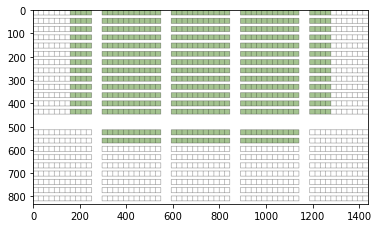

In [20]:
numpy_images = np.array(im)
# im.save('data/dst/pillow_imagedraw.jpg', quality=95)
plt.imshow(numpy_images)
plt.show()

In [21]:
def draw_seat(variable_x, save_path, profit):
    count = 0

    for r in range(rows): 
        for b in range(blocks): 
            for i in range(idx): 
                
                if save_path:
                    seat = variable_x[r,b,i].X
                else:
                    seat = variable_x[r,b,i]
                if seat > 0.9: # 소수점으로 나오는거 고려
                    fill_color = color.soso
                    count+=1
                else:
                    fill_color = color.white

                x = seat_loc[r][b][i][0] - seat_width/2
                y = seat_loc[r][b][i][1] - seat_height/2 
                draw.rectangle((x, y, x+seat_width, y+seat_height), fill=fill_color, outline=color.black)

    
    if save_path: # save_path is Not None
        print(save_path+'.jpg') 
        numpy_images = np.array(im)
        plt.title(str(count) + ' audiences and '+str(profit) + ' profits')
        plt.imshow(numpy_images)
        try:
            plt.savefig(save_path + '/profit=%s.jpg' % str(profit))
            plt.show()
            im.save(save_path+'/img.jpg', quality=95) # save the allocation result
        except:
            pass

        print(count, ' audiences here')
    else: # save_path is None, only show the results
        numpy_images = np.array(im)
        plt.imshow(numpy_images)
        plt.show()

## Beta 계산

In [22]:
def dist(seat_1, seat_2):
    # returns the euclidean distance between two seats
    return np.sqrt(((seat_1-seat_2)**2).sum())

In [23]:
beta=np.zeros((rows,blocks,idx,rows,blocks,idx)) # r,s,l,rr,ss,ll
# beta={}

In [24]:
bounds = np.array([1e-10, 46]) # 46 inches

In [25]:
for r in range(rows): 
    for b in range(blocks): 
        for i in range(idx): 
            seat_1 = seat_loc[r][b][i]
            for rr in range(rows): 
                for bb in range(blocks): 
                    for ii in range(idx): 
                        seat_2 = seat_loc[rr][bb][ii]
                        euc_dist = dist(seat_1, seat_2)
                        lower_bound = bounds[0] # lb
                        upper_bound = bounds[1] # ub
                        x = (r,b,i,rr,bb,ii)
                        if euc_dist > lower_bound and euc_dist <= upper_bound:
                            beta[x] = 1
                        else:
                            beta[x] = 0         

In [26]:
seat_1 = seat_loc[0,0,0]
seat_2 = seat_loc[0,0,2]

In [27]:
dist(seat_1, seat_2)

45.669316

In [28]:
beta[0,0,0,0,0,2]

1.0

## parameter setting

### $\lambda_\gamma$ : row 배치에 영향을 주는 파라미터

In [29]:
def get_lambda(gamma=1):
    lambda_gamma = np.array(
        [1/(14-r)**(1/gamma) for r in range(14)]+
        [1/(r-13)**(1/gamma) for r in range(14,19)]+
        [1/(22-r)**(1/gamma) for r in range(19,22)]
    )
    return lambda_gamma

### alpha: index 위치에 따른 패널티 부여

Vertical Aisle의 위치에 따라 다르게 가중치 생성

In [30]:
# 통로쪽으로 가까워 질수록 증가
alpha_A = [1 / (11-x) for x in range(11)]
alpha_A

[0.09090909090909091,
 0.1,
 0.1111111111111111,
 0.125,
 0.14285714285714285,
 0.16666666666666666,
 0.2,
 0.25,
 0.3333333333333333,
 0.5,
 1.0]

In [31]:
# B, C, D
alpha_mid = [1/x for x in range(1,7)] + [1/(11-x) for x in range(6,11)]
alpha_mid

[1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.2,
 0.25,
 0.3333333333333333,
 0.5,
 1.0]

In [32]:
# 통로에서 멀어 질수록 감소
alpha_E = [1/(1+x) for x in range(11)]
alpha_E

[1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091]

In [33]:
alpha = np.array([alpha_A] + [alpha_mid] * 3 + [alpha_E])

## GUROBI Solver

### Formulation. Normalized Weighting Method (Cohon 2013, Ehrgott 2006)

The proposed model is a bi-objective model, where the purpose is to identify trade-off solutions using multi-criteria optimization techniques. One popular technique is to use the normalized weighting method where each of the objectives is normalized by their own maximum magnitude and then the normalized terms are consolidated into one using non-negative weights that sum to one (Cohon 2013, Ehrgott 2006); in our model, we first find the maximum values, 𝛼 and 𝛽, for each of the two objectives individually, then normalize them by dividing the objectives by 𝛼 and 𝛽, respectively, and finally sum up all weighted normalized terms as one dimensionless objective using weights 𝑤 and 1−𝑤, for 𝑤 $\in [0,1]$.

$$ Z_{\text{location risk}} = \sum{\alpha\lambda_{\gamma}X}$$

$$ Z_{\text{distancing risk}} = \sum\sum{\delta_{k}\beta Y} $$

$$ Z_{\text{Risk Exposure}} = Z_{\text{location risk}} + Z_{\text{distancing risk}}$$

---

$$ Z_{\text{profit}} = \sum{w_{\text{vip}}X} $$  

$$ Z_{\text{Risk Exposure}}=\sum{\alpha\lambda_{\gamma}X} + \sum\sum{\delta_{k}\beta Y}$$

$$ \text{Maximize } \frac{w}{V} Z_{\text{profit}} -  \frac{1-w}{M} Z_{\text{Risk Exposure}}$$

$$ \text{ where } w \in [0,1]$$

$$ V = max \, Z_{\text{profit}} \,\, \text{ and } \,\, M = max \, Z_{\text{Risk Exposure}}$$

In [34]:
import gurobipy as gp
from gurobipy import GRB

In [35]:
y_combinations = gp.tuplelist()
for r in range(rows): 
    for b in range(blocks): 
        for i in range(idx): 
            for rr in range(rows): 
                for bb in range(blocks): 
                    for ii in range(idx): 
                        y_combinations.append((r,b,i,rr,bb,ii))
                        
x_combinations = gp.tuplelist()
for r in range(rows): 
    for b in range(blocks): 
        for i in range(idx): 
            x_combinations.append((r,b,i))

#### Find $M$ and $V$

First find $V$ -> Maximize the profit

In [36]:
m = gp.Model('model1')
variable_x = m.addVars(x_combinations, name='variable_X',vtype=GRB.BINARY)
# variable_y = m.addVars(y_combinations, name = 'variable_Y',vtype=GRB.BINARY)

Academic license - for non-commercial use only - expires 2021-07-07
Using license file C:\Users\wnsvy\gurobi.lic


In [37]:
z_profit = m.addVar(name='Z_profit', vtype=GRB.CONTINUOUS)

In [38]:
### profit constraints ###
profit_const = gp.LinExpr()
for r in range(rows): 
    for b in range(blocks): 
        for i in range(idx): 
            loc_1 = (r,b,i)
            profit_const += w_vip[loc_1] * variable_x[loc_1]
m.addConstr(profit_const == z_profit)

<gurobi.Constr *Awaiting Model Update*>

In [39]:
m.addConstr(variable_x.sum() == int(0.50 * len(variable_x) + 0.5)) # 50% 채우기

<gurobi.Constr *Awaiting Model Update*>

In [40]:
m.modelSense=GRB.MAXIMIZE
m.setObjective(z_profit)
m.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 1211 columns and 2421 nonzeros
Model fingerprint: 0xafd43cb0
Variable types: 1 continuous, 1210 integer (1210 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [6e+02, 6e+02]
Found heuristic solution: objective 651.9230769
Presolve removed 2 rows and 1211 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds
Thread count was 1 (of 16 available processors)

Solution count 2: 697.154 651.923 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.971538461538e+02, best bound 6.971538461538e+02, gap 0.0000%


In [41]:
profit = z_profit.X

In [42]:
profit

697.153846153848

None.jpg
605  audiences here


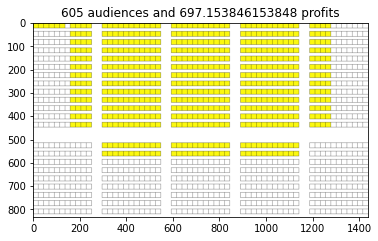

In [43]:
draw_seat(variable_x, 'None', profit)

In [44]:
V = profit

Next, find $\beta$ -> Maximize Risk Exposure

In [45]:
m = gp.Model('model1')
variable_x = m.addVars(x_combinations, name='variable_X',vtype=GRB.BINARY)
variable_y = m.addVars(y_combinations, name = 'variable_Y',vtype=GRB.BINARY)

In [46]:
z_location_risk = m.addVar(name='Z_Loc_risk', vtype=GRB.CONTINUOUS)
z_distancing_risk = m.addVar(name='Z_Dist_risk', vtype=GRB.CONTINUOUS)

In [47]:
### audience constratins ###
## m.addConstr(variable_x.sum() >= 0.65 * len(variable_x))
# m.addConstr(variable_x.sum() == int(0.65 * len(variable_x) + 0.5)) # 65% 정확히 채우기
m.addConstr(variable_x.sum() == int(0.50 * len(variable_x) + 0.5)) # 50% 정확히 채우기


m.addConstrs((variable_y[(r,b,i,rr,bb,ii)]  <= 
              (variable_x[(r,b,i)] + variable_x[(rr,bb,ii)]) / 2
                  for r in range(rows)
                  for b in range(blocks)
                  for i in range(idx)
                  for rr in range(rows)
                  for bb in range(blocks)
                  for ii in range(idx)
                  if (r,b,i) != (rr,bb,ii)), name='y_constr')

lambda_gamma = get_lambda(gamma=1)

location_risk = gp.LinExpr() # 위치에 기반한 리스크 (복도 근처 패널티, 람다, 알파 관련)    

for r in range(rows): 
    for b in range(blocks): 
        for i in range(idx): 
            loc_1 = (r,b,i)
            location_risk += alpha[b,i] * lambda_gamma[r] * variable_x[loc_1]
m.addConstr(location_risk == z_location_risk)

distancing_risk = gp.LinExpr() # 거리두기에 기반한 리스크 (베타 관련)
for r in range(rows): 
    for b in range(blocks): 
        for i in range(idx): 
            loc_1 = (r,b,i)
            for rr in range(rows): 
                for bb in range(blocks): 
                    for ii in range(idx): 
                        loc_2 = (rr,bb,ii)
                        loc = loc_1 + loc_2
                        distancing_risk += variable_y[loc] * beta[loc]
m.addConstr(distancing_risk == z_distancing_risk)


<gurobi.Constr *Awaiting Model Update*>

In [48]:
## Set Objective
m.modelSense=GRB.MAXIMIZE
m.setObjective(z_location_risk + z_distancing_risk)

m.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1462893 rows, 1465312 columns and 4401472 nonzeros
Model fingerprint: 0x6b05a337
Variable types: 2 continuous, 1465310 integer (1465310 binary)
Coefficient statistics:
  Matrix range     [6e-03, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [6e+02, 6e+02]
Found heuristic solution: objective 71.5414987
Presolve removed 1457702 rows and 1458912 columns
Presolve time: 1.24s
Presolved: 5191 rows, 6400 columns, 16780 nonzeros
Variable types: 0 continuous, 6400 integer (6400 binary)

Root relaxation: objective 6.087418e+03, 9151 iterations, 0.11 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 6087.41818    0 1268   71.54150 6087.41818  8409%     -    1s
H    0     0    

In [49]:
location_risk = z_location_risk.X
distancing_risk = z_distancing_risk.X
total_risk = location_risk + distancing_risk

None.jpg
605  audiences here


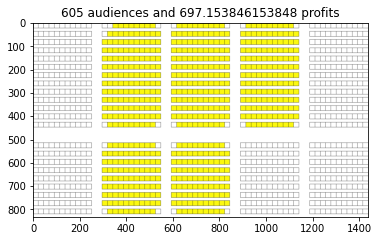

In [50]:
draw_seat(variable_x, 'None', profit)

In [51]:
location_risk

68.86875402375411

In [52]:
distancing_risk

5212.0

In [53]:
total_risk

5280.868754023754

In [54]:
M = total_risk

#### Solve Bi objective model

In [55]:
def solve_model(alpha, w, gamma): # bi-objective model
    
    print(save_path)
    
    lambda_gamma = get_lambda(gamma=gamma)
    
    m = gp.Model('Model1')

    ### variables ###
    variable_x = m.addVars(x_combinations, name='variable_X',vtype=GRB.BINARY)
    variable_y = m.addVars(y_combinations, name = 'variable_Y',vtype=GRB.BINARY)
    z_location_risk = m.addVar(name='Z_Loc_risk', vtype=GRB.CONTINUOUS)
    z_distancing_risk = m.addVar(name='Z_Dist_risk', vtype=GRB.CONTINUOUS)
    z_risk_exposure = m.addVar(name='Z_risk_exposure', vtype=GRB.CONTINUOUS)
    z_profit = m.addVar(name='Z_profit', vtype=GRB.CONTINUOUS)


    m.addConstrs((variable_x[(r,b,i)] + variable_x[(rr,bb,ii)] - 1 <= 
                  variable_y[(r,b,i,rr,bb,ii)] 
                  for r in range(rows)
                  for b in range(blocks)
                  for i in range(idx)
                  for rr in range(rows)
                  for bb in range(blocks)
                  for ii in range(idx)
                  if (r,b,i) != (rr,bb,ii)), name='y_constr')

    
    ### risk constraints ###
    
    location_risk = gp.LinExpr() # 위치에 기반한 리스크 (복도 근처 패널티, 람다, 알파 관련)    
    for r in range(rows): 
        for b in range(blocks): 
            for i in range(idx): 
                loc_1 = (r,b,i)
                location_risk += alpha[b,i] * lambda_gamma[r] * variable_x[loc_1]
    m.addConstr(location_risk == z_location_risk)
    
    distancing_risk = gp.LinExpr() # 거리두기에 기반한 리스크 (베타 관련)
    for r in range(rows): 
        for b in range(blocks): 
            for i in range(idx): 
                loc_1 = (r,b,i)
                for rr in range(rows): 
                    for bb in range(blocks): 
                        for ii in range(idx): 
                            loc_2 = (rr,bb,ii)
                            loc = loc_1 + loc_2
                            distancing_risk += variable_y[loc] * beta[loc]
    m.addConstr(distancing_risk == z_distancing_risk)
    
    m.addConstr(z_risk_exposure == z_distancing_risk + z_location_risk) # Z_risk_exposure (total risk)

    ### profit constraints ###
    profit_const = gp.LinExpr()
    for r in range(rows): 
        for b in range(blocks): 
            for i in range(idx): 
                loc_1 = (r,b,i)
                profit_const += w_vip[loc_1] * variable_x[loc_1]
    m.addConstr(profit_const == z_profit)

    ### audience constratins ###
    ## m.addConstr(variable_x.sum() >= 0.65 * len(variable_x))
    m.addConstr(variable_x.sum() == int(0.50 * len(variable_x) + 0.5)) # 50% 채우기

    ## Set Objective
    m.modelSense=GRB.MAXIMIZE
    m.setObjective((w/V) * z_profit - ((1-w)/M) * z_risk_exposure ) # Bi-objective
    
    m.setParam("TimeLimit", 1200.0); # time limit 최대 20분
    m.optimize()
    
    profit = z_profit.X # profit
    location_risk = z_location_risk.X # location risk
    distancing_risk = z_distancing_risk.X # distancing risk
    risk_exposure = z_risk_exposure.X # total risk exposure
    
    draw_seat(variable_x, save_path, profit) # draw the allocation result
        
    ret_x = np.zeros([rows,blocks,idx]) # seat assign result
    
    for r in range(rows): 
        for b in range(blocks): 
            for i in range(idx):
                ret_x[r,b,i] = variable_x[(r,b,i)].X
                
    np.save(save_path + '/variable_x', ret_x) # save the X result as a numpy array
    pr_ratio = profit / risk_exposure
    post_message(myToken,"#working_complete",save_path + ' Saved Completed!!!!!!!!  Profit = ' + str(profit) +
                'Total_risk = ' + str(risk_exposure) + '    PR_ratio = ' + str(pr_ratio))
    

    return profit, location_risk, distancing_risk

---

## Baseline Setting (1자리 건너 1자리 띄우기)

In [57]:
count = 0
base_x = np.zeros([rows,blocks,idx])
for r in range(rows):
    for b in range(blocks):
        for i in range(idx):
            count += 1
            base_x[r,b,i] = count % 2

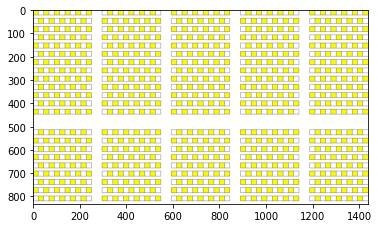

In [58]:
draw_seat(base_x,0,0) # 50% 무지성 배열

In [59]:
def calc_base_PR_ratio():
    
    lambda_gamma = get_lambda(gamma)
    ### risk ###
    location_risk = 0
    for r in range(rows): 
        for b in range(blocks): 
            for i in range(idx): 
                loc_1 = (r,b,i)
                location_risk += alpha[b,i] * lambda_gamma[r] * base_x[loc_1]
    
    distancing_risk = 0 # 거리두기에 기반한 리스크 (베타 관련)
    for r in range(rows): 
        for b in range(blocks): 
            for i in range(idx): 
                loc_1 = (r,b,i)
                for rr in range(rows): 
                    for bb in range(blocks): 
                        for ii in range(idx): 
                            loc_2 = (rr,bb,ii)
                            loc = loc_1 + loc_2
                            distancing_risk += base_x[loc_1] * base_x[loc_2] * beta[loc] # Y \times \beta

    ### profit constraints ###
    profit = 0
    for r in range(rows): 
        for b in range(blocks): 
            for i in range(idx): 
                loc_1 = (r,b,i)
                profit += w_vip[loc_1] * base_x[loc_1]
    
    total_risk = location_risk + distancing_risk
    pr_ratio = profit / total_risk
    return profit, location_risk, distancing_risk, total_risk, pr_ratio

In [60]:
calc_base_PR_ratio()

(650.999999999998,
 74.539674730032,
 2990.0,
 3064.539674730032,
 0.21242994677735647)

## Parameter Searching

gamma and w is hyper parameter

In [62]:
gamma = 1
w = 0.3

solving....
bi_obj_half_edit_beta/w=0.3 gamma=1
Changed value of parameter TimeLimit to 1200.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1462895 rows, 1465314 columns and 4402686 nonzeros
Model fingerprint: 0xd7c8815a
Variable types: 4 continuous, 1465310 integer (1465310 binary)
Coefficient statistics:
  Matrix range     [6e-03, 1e+00]
  Objective range  [1e-04, 4e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+02]
Presolve removed 1457704 rows and 1458914 columns
Presolve time: 1.38s
Presolved: 5191 rows, 6400 columns, 16780 nonzeros
Variable types: 0 continuous, 6400 integer (6400 binary)
Found heuristic solution: objective -0.0432366

Root relaxation: objective 2.702882e-01, 1237 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth 

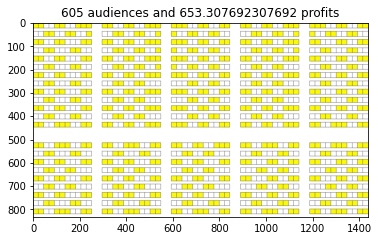

605  audiences here
<Response [200]>


In [63]:
folder_name = 'w=%s gamma=%d' % (str(w), gamma)
save_path = basic_path + '/' + folder_name
if makedirs(save_path): # 폴더 첫 생성
    print('solving....')
    profit, location_risk, distancing_risk = solve_model(alpha, w, gamma)
    total_risk = location_risk + distancing_risk
else:
    post_message(myToken,"#working_complete",save_path + ' Folder already Exists')

In [72]:
results = []
w_range = np.linspace(0,1,11) # [0, 0.1, 0.2 ... 0.9, 1]
gamma_range = [1,5,9]

bi_obj_half_edit_beta/w=1.0 gamma=9
Changed value of parameter TimeLimit to 1200.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1462895 rows, 1465314 columns and 4402686 nonzeros
Model fingerprint: 0x2348d07d
Variable types: 4 continuous, 1465310 integer (1465310 binary)
Coefficient statistics:
  Matrix range     [7e-02, 1e+00]
  Objective range  [1e-03, 1e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+02]
Presolve removed 1462895 rows and 1465314 columns
Presolve time: 1.07s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 1.83 seconds
Thread count was 1 (of 16 available processors)

Solution count 1: 1 
No other solutions better than 1

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+00, best bound 1.000000000000e+00, gap 0.0000%
bi_obj_half_edit_b

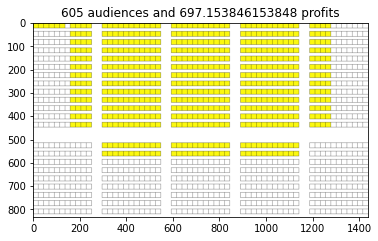

605  audiences here
<Response [200]>


In [73]:
from IPython.display import clear_output
for gamma in gamma_range:
    for w in w_range:
        folder_name = 'w=%s gamma=%d' % (str(w), gamma) 
        save_path = basic_path + '/' + folder_name
        if makedirs(save_path): # 폴더 첫 생성
            try:
                profit, location_risk, distancing_risk = solve_model(alpha, w, gamma)
                total_risk = location_risk + distancing_risk
                results.append([w, gamma, save_path, profit, location_risk, distancing_risk, total_risk])
            except: # time limit
                post_message(myToken,"#working_complete",save_path + ' Time Limit!!!!!!!!!!!!') # time limit cases
                pass
        else:
            post_message(myToken,"#working_complete",save_path + ' Folder already Exists')
        clear_output(wait=True)

## Results Analysis

* Allocation 결과마다 폴더를 생성하여 그 안에 이미지와 X값 array로 저장
* result_df에 각 allocation에 따른 값들 저장

![](https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/60756e3587120e556e094895/aa5cf19221cf38e55b7ae0615d77d9db/image.png)

![](https://trello-attachments.s3.amazonaws.com/5b29ec749cfb0d90ada47d03/60756e3587120e556e094895/e0ff138574f05fb983e54db4ff3d1ec6/image.png)

In [74]:
results_df= pd.DataFrame(results,columns = ['w','gamma','save_path','profit','location_risk','distancing_risk','total_risk'])
results_df.head()
results_df = results_df.sort_values('profit', ascending=False)

In [75]:
# processing (risk대비 profit 계산)

In [76]:
results_df.to_pickle(basic_path + '/result_summary.pkl')

In [77]:
results_df['PR_Ratio'] = results_df['profit'] / results_df['total_risk']

In [78]:
results_df.sort_values(by='PR_Ratio',ascending=False)

,w,gamma,save_path,profit,location_risk,distancing_risk,total_risk,PR_Ratio
3,0.3,5,bi_obj_half_edit_beta/w=0.30000000000000004 ga...,652.076923,174.756885,1480.0,1654.756885,0.394062
2,0.2,5,bi_obj_half_edit_beta/w=0.2 gamma=5,651.769231,174.126656,1480.0,1654.126656,0.394026
1,0.1,5,bi_obj_half_edit_beta/w=0.1 gamma=5,651.769231,174.126656,1480.0,1654.126656,0.394026
4,0.4,5,bi_obj_half_edit_beta/w=0.4 gamma=5,653.307692,179.651524,1480.0,1659.651524,0.393641
5,0.5,5,bi_obj_half_edit_beta/w=0.5 gamma=5,653.307692,179.651524,1480.0,1659.651524,0.393641
6,0.6,5,bi_obj_half_edit_beta/w=0.6000000000000001 gam...,653.307692,179.660565,1480.0,1659.660565,0.393639
0,0.0,5,bi_obj_half_edit_beta/w=0.0 gamma=5,649.461538,172.711781,1480.0,1652.711781,0.392967
14,0.3,9,bi_obj_half_edit_beta/w=0.30000000000000004 ga...,652.076923,196.158994,1480.0,1676.158994,0.389030
13,0.2,9,bi_obj_half_edit_beta/w=0.2 gamma=9,651.769231,195.452701,1480.0,1675.452701,0.389011
15,0.4,9,bi_obj_half_edit_beta/w=0.4 gamma=9,652.692308,199.103677,1480.0,1679.103677,0.388715


In [79]:
results_df.sort_values(by='PR_Ratio',ascending=False).iloc[0]['save_path']

'bi_obj_half_edit_beta/w=0.30000000000000004 gamma=5'

In [80]:
results_df.sort_values(by='PR_Ratio',ascending=False)[['w','profit','total_risk','PR_Ratio']].set_index('w')

,profit,total_risk,PR_Ratio
w,,,
0.3,652.076923,1654.756885,0.394062
0.2,651.769231,1654.126656,0.394026
0.1,651.769231,1654.126656,0.394026
0.4,653.307692,1659.651524,0.393641
0.5,653.307692,1659.651524,0.393641
0.6,653.307692,1659.660565,0.393639
0.0,649.461538,1652.711781,0.392967
0.3,652.076923,1676.158994,0.389030
0.2,651.769231,1675.452701,0.389011
